In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pip install linearmodels

  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.28
    Uninstalling Cython-0.29.28:
      Successfully uninstalled Cython-0.29.28
Note: you may need to restart the kernel to use updated packages.


In [2]:
import linearmodels as lm
from linearmodels.panel import PooledOLS, PanelOLS, RandomEffects
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [3]:
pd.options.display.float_format = '{:,.6f}'.format

In [5]:
data = pd.read_excel('my_data.xlsx', index_col=0)
data.head()

,регион,год,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,коэффициент ранней неонатальной смертности,общий коэффициент брачности,материнская смертность,коэффициент младенческой смертности,величина прожиточного минимума на ребенка в возрасте до 16 лет,"число прерываний беременности, на конец года","число фельдшерско-акушерских пунктов, на конец года",численность безработных в возрасте 15-72 лет,среднемесячная номинальная начисленная заработная плата работников,реальная среднемесячная начисленная заработная плата работников
0,Белгородская область,2011,11.100000,27.530000,1.230000,9.800000,NaN,5.000000,"5,117.250000",7372,555,33.200000,"17,667.600000",102.400000
1,Белгородская область,2012,11.600000,27.640000,2.520000,8.100000,NaN,7.100000,"5,103.500000",6622,552,29.500000,"20,002.100000",109.100000
2,Белгородская область,2013,11.600000,27.820000,1.740000,8.700000,11.200000,6.484000,"5,826.750000",6381,546,32.200000,"22,220.900000",103.600000
3,Белгородская область,2014,11.500000,28.010000,1.020000,8.500000,5.600000,5.769000,"6,414.000000",5380,543,32.500000,"23,895.000000",100.086946
4,Белгородская область,2015,11.500000,28.140000,2.090000,8.300000,11.300000,6.200000,"7,945.750000",5007,542,32.800000,"25,456.000000",93.221157


In [70]:
len(data['регион'].unique())

28

In [6]:
data[data['регион'] == 'Москва'].describe()

,год,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,коэффициент ранней неонатальной смертности,общий коэффициент брачности,материнская смертность,коэффициент младенческой смертности,величина прожиточного минимума на ребенка в возрасте до 16 лет,"число прерываний беременности, на конец года","число фельдшерско-акушерских пунктов, на конец года",численность безработных в возрасте 15-72 лет,среднемесячная номинальная начисленная заработная плата работников,реальная среднемесячная начисленная заработная плата работников
count,9.000000,9.000000,9.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,"2,015.000000",11.111111,29.395556,1.866667,7.488889,11.928571,6.176111,"11,602.305556","33,479.333333",5.333333,101.459889,"64,710.366667",103.549889
std,2.738613,0.451233,0.686697,0.626079,0.855050,3.177375,1.048703,"2,620.483226","2,917.963374",4.690416,21.861503,"14,818.562762",6.079260
min,"2,011.000000",10.500000,28.140000,1.120000,6.000000,8.100000,4.800000,"8,004.000000","29,247.000000",1.000000,54.758000,"44,898.700000",90.087276
25%,"2,013.000000",10.700000,29.510000,1.470000,6.900000,9.900000,5.700000,"9,340.500000","30,681.000000",2.000000,95.386000,"55,485.200000",102.209302
50%,"2,015.000000",11.300000,29.690000,1.790000,7.800000,10.600000,6.000000,"12,789.500000","34,607.000000",2.000000,99.603000,"64,310.000000",106.400000
75%,"2,017.000000",11.300000,29.810000,2.070000,8.100000,13.900000,6.200000,"13,732.750000","35,597.000000",7.000000,117.078000,"71,379.000000",107.600000
max,"2,019.000000",11.800000,29.870000,3.130000,8.500000,17.200000,8.100000,"14,800.250000","37,454.000000",14.000000,127.064000,"94,294.000000",109.600000


In [9]:
44898.700000 < (44898.700000 + 1.5*(94294.000000 - 102.209302))

True

In [11]:
94294.000000 > (94294.000000 + 1.5*(94294.000000 - 102.209302))

False

Выбросы есть в данных по Москве в номинальной ЗП

### Анализ данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   регион                                                              252 non-null    object 
 1   год                                                                 252 non-null    int64  
 2   общий коэффициент рождаемости                                       252 non-null    float64
 3   средний возраст матери при рождении ребёнка                         251 non-null    float64
 4   коэффициент ранней неонатальной смертности                          252 non-null    float64
 5   общий коэффициент брачности                                         252 non-null    float64
 6   материнская смертность                                              142 non-null    float64
 7   коэффициент младе

In [8]:
data['номинальная - прожиточный минимум ребенка'] = data['среднемесячная номинальная начисленная заработная плата работников'] - data['величина прожиточного минимума на ребенка в возрасте до 16 лет']

In [9]:
data.describe()

,год,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,коэффициент ранней неонатальной смертности,общий коэффициент брачности,материнская смертность,коэффициент младенческой смертности,величина прожиточного минимума на ребенка в возрасте до 16 лет,"число прерываний беременности, на конец года","число фельдшерско-акушерских пунктов, на конец года",численность безработных в возрасте 15-72 лет,среднемесячная номинальная начисленная заработная плата работников,реальная среднемесячная начисленная заработная плата работников,номинальная - прожиточный минимум ребенка
count,252.000000,252.000000,251.000000,252.000000,252.000000,142.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,"2,015.000000",10.878175,28.212510,2.114722,7.535317,15.998592,6.093052,"9,287.069444","9,277.781746",344.099206,36.557909,"33,380.019048",102.274417,"24,092.949603"
std,2.587127,1.424417,0.546583,1.092036,1.238454,9.904859,1.644810,"4,447.627842","7,970.259789",191.825042,23.601736,"58,149.929274",5.503926,"57,795.341045"
min,"2,011.000000",7.500000,27.030000,0.000000,4.000000,3.600000,2.400000,"4,341.500000","2,753.000000",1.000000,10.967000,"13,912.000000",87.786177,"5,854.500000"
25%,"2,013.000000",9.800000,27.825000,1.397500,6.500000,8.125000,4.800000,"6,651.375000","4,922.500000",196.250000,23.620500,"22,093.750000",99.805558,"14,114.187500"
50%,"2,015.000000",11.000000,28.190000,2.060000,7.700000,13.250000,6.000000,"8,852.500000","6,633.500000",370.500000,30.907500,"26,752.500000",102.925989,"17,695.000000"
75%,"2,017.000000",11.825000,28.580000,2.692500,8.300000,21.075000,7.300000,"10,180.437500","9,380.500000",506.250000,39.042750,"33,977.550000",106.014532,"23,370.587500"
max,"2,019.000000",15.000000,29.870000,6.790000,11.300000,56.600000,10.500000,"33,410.000000","43,446.000000",695.000000,148.385000,"933,329.000000",117.100000,"923,231.250000"


На основе исследований Синяковской и Тындика, следует включить возраст женщины и брачный статус.[1] На основе исследований Архангельского, Шабунова и Калачикова, следует включить занятость (будем рассматривать численность безработных в субъекте, как в статье [2]), уровень дохода (номинальная и реальная ЗП, прожиточный минимум на детей, как в статье [2]).[1] На основе статьи [2] стоит включить обеспеченность амбулаторно-поликлиническими учреждениями и число прерывания беременности. Кроме того, на мой взгляд, стоит рассмотреть уровень оказания медицинских услуг, который можно оценить на основе материнской и младенческой смертности. Тогда спецификация приметь вид:

* x1 – средний возраст матери при рождении ребёнка
* x2 – общий коэффициент брачности
* x3 – численность безработных в возрасте 15-72 лет
* x4 – среднемесячная номинальная начисленная заработная плата работников
* x5 – реальная среднемесячная начисленная заработная плата работников
* x6 – величина прожиточного минимума на ребенка в возрасте до 16 лет
* x7 – число фельдшерско-акушерских пунктов
* x8 – число прерываний беременности
* x9 – материнская смертность
* x10 – коэффициент младенческой смертности
* y – общий коэффициент рождаемости

$$
y_{it} = a + b_1 \cdot x_{1it} + b_2 \cdot x_{2it} + b_3 \cdot x_{3it} + b_4 \cdot x_{4it} + b_5 \cdot x_{5it} + b_6 \cdot x_{6it} + b_7 \cdot x_{7it} + b_8 \cdot x_{8it} + b_9 \cdot x_{9it} + b_10 \cdot x_{10it} + e_{it}
$$

In [10]:
data.columns = data.columns.str.replace(' число фельдшерско-акушерских пунктов, на конец года',
                                        'число фельдшерско-акушерских пунктов')
data.columns = data.columns.str.replace(' число прерываний беременности, на конец года',
                                        'число прерываний беременности')

In [11]:
need_col = ['общий коэффициент рождаемости',
            'средний возраст матери при рождении ребёнка',
            'общий коэффициент брачности',
            'численность безработных в возрасте 15-72 лет',
            'среднемесячная номинальная начисленная заработная плата работников',
            'реальная среднемесячная начисленная заработная плата работников',
            'величина прожиточного минимума на ребенка в возрасте до 16 лет',
            'число фельдшерско-акушерских пунктов',
            'число прерываний беременности',
            'материнская смертность', 
            'коэффициент младенческой смертности']

In [12]:
corr = data[need_col].corr()
corr.style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,среднемесячная номинальная начисленная заработная плата работников,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,материнская смертность,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.129988,0.418861,0.168994,-0.032389,-0.278506,-0.044505,-0.110178,0.299816,-0.070792,0.379146
средний возраст матери при рождении ребёнка,0.129988,1.000000,-0.070021,0.322203,0.118706,-0.055891,0.084396,-0.331807,0.371190,0.075403,-0.059570
общий коэффициент брачности,0.418861,-0.070021,1.000000,0.149501,-0.069380,-0.051541,-0.188998,-0.060705,0.200629,-0.096126,0.268542
численность безработных в возрасте 15-72 лет,0.168994,0.322203,0.149501,1.000000,0.061354,-0.024485,0.098608,-0.023219,0.881459,-0.350617,-0.101802
среднемесячная номинальная начисленная заработная плата работников,-0.032389,0.118706,-0.069380,0.061354,1.000000,0.065618,0.117725,-0.086763,0.051369,-0.156025,-0.127598
реальная среднемесячная начисленная заработная плата работников,-0.278506,-0.055891,-0.051541,-0.024485,0.065618,1.000000,-0.079344,0.019418,0.053225,0.094411,0.031886
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.044505,0.084396,-0.188998,0.098608,0.117725,-0.079344,1.000000,-0.073990,0.002201,-0.041721,-0.229745
число фельдшерско-акушерских пунктов,-0.110178,-0.331807,-0.060705,-0.023219,-0.086763,0.019418,-0.073990,1.000000,-0.129161,-0.193740,0.136072
число прерываний беременности,0.299816,0.371190,0.200629,0.881459,0.051369,0.053225,0.002201,-0.129161,1.000000,-0.274990,0.005267
материнская смертность,-0.070792,0.075403,-0.096126,-0.350617,-0.156025,0.094411,-0.041721,-0.193740,-0.274990,1.000000,0.205432


In [13]:
need_col = ['общий коэффициент рождаемости',
            'средний возраст матери при рождении ребёнка',
            'общий коэффициент брачности',
            'численность безработных в возрасте 15-72 лет',
            'реальная среднемесячная начисленная заработная плата работников',
            'величина прожиточного минимума на ребенка в возрасте до 16 лет',
            'число фельдшерско-акушерских пунктов',
            'число прерываний беременности',
            'коэффициент младенческой смертности']

In [14]:
# матрица корреляций
corr = data[need_col].corr()
corr.style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.129988,0.418861,0.168994,-0.278506,-0.044505,-0.110178,0.299816,0.379146
средний возраст матери при рождении ребёнка,0.129988,1.000000,-0.070021,0.322203,-0.055891,0.084396,-0.331807,0.371190,-0.059570
общий коэффициент брачности,0.418861,-0.070021,1.000000,0.149501,-0.051541,-0.188998,-0.060705,0.200629,0.268542
численность безработных в возрасте 15-72 лет,0.168994,0.322203,0.149501,1.000000,-0.024485,0.098608,-0.023219,0.881459,-0.101802
реальная среднемесячная начисленная заработная плата работников,-0.278506,-0.055891,-0.051541,-0.024485,1.000000,-0.079344,0.019418,0.053225,0.031886
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.044505,0.084396,-0.188998,0.098608,-0.079344,1.000000,-0.073990,0.002201,-0.229745
число фельдшерско-акушерских пунктов,-0.110178,-0.331807,-0.060705,-0.023219,0.019418,-0.073990,1.000000,-0.129161,0.136072
число прерываний беременности,0.299816,0.371190,0.200629,0.881459,0.053225,0.002201,-0.129161,1.000000,0.005267
коэффициент младенческой смертности,0.379146,-0.059570,0.268542,-0.101802,0.031886,-0.229745,0.136072,0.005267,1.000000


In [15]:
# Посмотрим матрицы корреляций для отдельных субъектов
corrs_region = {}
for region in data['регион'].unique():
    corrs_region[region] = data[data['регион'] == region][need_col].corr()

In [16]:
corrs_region['Белгородская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.766493,0.598699,-0.104612,-0.342413,-0.717720,0.886857,0.746477,0.860943
средний возраст матери при рождении ребёнка,-0.766493,1.000000,-0.843661,0.225653,-0.084360,0.976285,-0.721487,-0.988647,-0.574294
общий коэффициент брачности,0.598699,-0.843661,1.000000,0.112164,-0.186508,-0.795896,0.580931,0.820375,0.281614
численность безработных в возрасте 15-72 лет,-0.104612,0.225653,0.112164,1.000000,-0.611244,0.299691,-0.073533,-0.168033,-0.328550
реальная среднемесячная начисленная заработная плата работников,-0.342413,-0.084360,-0.186508,-0.611244,1.000000,-0.236473,-0.295219,0.081063,-0.073743
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.717720,0.976285,-0.795896,0.299691,-0.236473,1.000000,-0.652208,-0.956758,-0.568415
число фельдшерско-акушерских пунктов,0.886857,-0.721487,0.580931,-0.073533,-0.295219,-0.652208,1.000000,0.735370,0.732923
число прерываний беременности,0.746477,-0.988647,0.820375,-0.168033,0.081063,-0.956758,0.735370,1.000000,0.537591
коэффициент младенческой смертности,0.860943,-0.574294,0.281614,-0.328550,-0.073743,-0.568415,0.732923,0.537591,1.000000


In [17]:
corrs_region['Брянская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.870130,0.628691,0.627380,-0.199732,-0.746228,0.577528,0.862400,0.851990
средний возраст матери при рождении ребёнка,-0.870130,1.000000,-0.864222,-0.887281,-0.110508,0.966687,-0.354844,-0.992237,-0.869633
общий коэффициент брачности,0.628691,-0.864222,1.000000,0.870878,-0.036370,-0.832022,0.349429,0.862253,0.771088
численность безработных в возрасте 15-72 лет,0.627380,-0.887281,0.870878,1.000000,0.082920,-0.865779,0.206207,0.913369,0.733470
реальная среднемесячная начисленная заработная плата работников,-0.199732,-0.110508,-0.036370,0.082920,1.000000,-0.348569,-0.525253,0.059802,-0.066798
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.746228,0.966687,-0.832022,-0.865779,-0.348569,1.000000,-0.201776,-0.945544,-0.784058
число фельдшерско-акушерских пунктов,0.577528,-0.354844,0.349429,0.206207,-0.525253,-0.201776,1.000000,0.319281,0.512373
число прерываний беременности,0.862400,-0.992237,0.862253,0.913369,0.059802,-0.945544,0.319281,1.000000,0.855906
коэффициент младенческой смертности,0.851990,-0.869633,0.771088,0.733470,-0.066798,-0.784058,0.512373,0.855906,1.000000


In [18]:
corrs_region['Владимирская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.764755,0.719307,0.479869,-0.423412,-0.636130,0.362490,0.759407,0.839664
средний возраст матери при рождении ребёнка,-0.764755,1.000000,-0.971663,-0.265927,0.048829,0.959221,-0.742336,-0.989160,-0.774582
общий коэффициент брачности,0.719307,-0.971663,1.000000,0.278346,-0.176032,-0.900043,0.754884,0.938613,0.692726
численность безработных в возрасте 15-72 лет,0.479869,-0.265927,0.278346,1.000000,-0.518071,-0.120260,0.303627,0.316867,-0.022663
реальная среднемесячная начисленная заработная плата работников,-0.423412,0.048829,-0.176032,-0.518071,1.000000,-0.217050,-0.129489,-0.006004,-0.136431
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.636130,0.959221,-0.900043,-0.120260,-0.217050,1.000000,-0.697162,-0.965088,-0.721738
число фельдшерско-акушерских пунктов,0.362490,-0.742336,0.754884,0.303627,-0.129489,-0.697162,1.000000,0.771494,0.380704
число прерываний беременности,0.759407,-0.989160,0.938613,0.316867,-0.006004,-0.965088,0.771494,1.000000,0.755320
коэффициент младенческой смертности,0.839664,-0.774582,0.692726,-0.022663,-0.136431,-0.721738,0.380704,0.755320,1.000000


In [19]:
corrs_region['Воронежская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.635692,0.416684,0.497725,-0.210989,-0.654597,0.448727,0.746828,0.600927
средний возраст матери при рождении ребёнка,-0.635692,1.000000,-0.819376,-0.906748,-0.234075,0.939102,-0.874406,-0.968205,-0.854039
общий коэффициент брачности,0.416684,-0.819376,1.000000,0.743500,-0.085299,-0.705783,0.811661,0.746653,0.646040
численность безработных в возрасте 15-72 лет,0.497725,-0.906748,0.743500,1.000000,0.216341,-0.758760,0.886243,0.917165,0.618109
реальная среднемесячная начисленная заработная плата работников,-0.210989,-0.234075,-0.085299,0.216341,1.000000,-0.401258,0.052613,0.180994,0.358169
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.654597,0.939102,-0.705783,-0.758760,-0.401258,1.000000,-0.682659,-0.915916,-0.956074
число фельдшерско-акушерских пунктов,0.448727,-0.874406,0.811661,0.886243,0.052613,-0.682659,1.000000,0.806487,0.527881
число прерываний беременности,0.746828,-0.968205,0.746653,0.917165,0.180994,-0.915916,0.806487,1.000000,0.833022
коэффициент младенческой смертности,0.600927,-0.854039,0.646040,0.618109,0.358169,-0.956074,0.527881,0.833022,1.000000


In [20]:
corrs_region['Ивановская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.657559,0.808498,0.657119,-0.255448,-0.557175,0.517146,0.616117,0.534638
средний возраст матери при рождении ребёнка,-0.657559,1.000000,-0.913596,-0.794472,-0.134368,0.974514,-0.756743,-0.991257,-0.869433
общий коэффициент брачности,0.808498,-0.913596,1.000000,0.666740,-0.066099,-0.862247,0.769876,0.877928,0.763115
численность безработных в возрасте 15-72 лет,0.657119,-0.794472,0.666740,1.000000,-0.049668,-0.716462,0.661861,0.831204,0.674350
реальная среднемесячная начисленная заработная плата работников,-0.255448,-0.134368,-0.066099,-0.049668,1.000000,-0.340564,-0.022373,0.142670,-0.076923
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.557175,0.974514,-0.862247,-0.716462,-0.340564,1.000000,-0.739764,-0.964917,-0.813061
число фельдшерско-акушерских пунктов,0.517146,-0.756743,0.769876,0.661861,-0.022373,-0.739764,1.000000,0.737693,0.764216
число прерываний беременности,0.616117,-0.991257,0.877928,0.831204,0.142670,-0.964917,0.737693,1.000000,0.834073
коэффициент младенческой смертности,0.534638,-0.869433,0.763115,0.674350,-0.076923,-0.813061,0.764216,0.834073,1.000000


In [21]:
corrs_region['Калужская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.491689,0.475508,0.255103,-0.512342,-0.446147,0.404456,0.476601,0.778513
средний возраст матери при рождении ребёнка,-0.491689,1.000000,-0.816964,-0.780586,-0.126337,0.973943,-0.910760,-0.967826,-0.760603
общий коэффициент брачности,0.475508,-0.816964,1.000000,0.639267,-0.257699,-0.778615,0.718090,0.787757,0.581700
численность безработных в возрасте 15-72 лет,0.255103,-0.780586,0.639267,1.000000,0.035632,-0.753517,0.783051,0.840810,0.362391
реальная среднемесячная начисленная заработная плата работников,-0.512342,-0.126337,-0.257699,0.035632,1.000000,-0.237559,0.022421,0.113745,-0.147335
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.446147,0.973943,-0.778615,-0.753517,-0.237559,1.000000,-0.858533,-0.927029,-0.730314
число фельдшерско-акушерских пунктов,0.404456,-0.910760,0.718090,0.783051,0.022421,-0.858533,1.000000,0.873817,0.698623
число прерываний беременности,0.476601,-0.967826,0.787757,0.840810,0.113745,-0.927029,0.873817,1.000000,0.632081
коэффициент младенческой смертности,0.778513,-0.760603,0.581700,0.362391,-0.147335,-0.730314,0.698623,0.632081,1.000000


In [22]:
corrs_region['Костромская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.831357,0.830718,0.665293,-0.479407,-0.797239,-0.439841,0.835488,0.639726
средний возраст матери при рождении ребёнка,-0.831357,1.000000,-0.954922,-0.511470,0.120603,0.981570,0.765716,-0.971342,-0.513829
общий коэффициент брачности,0.830718,-0.954922,1.000000,0.519030,-0.222751,-0.952054,-0.729043,0.951322,0.587967
численность безработных в возрасте 15-72 лет,0.665293,-0.511470,0.519030,1.000000,-0.517026,-0.442905,-0.578417,0.668968,0.139776
реальная среднемесячная начисленная заработная плата работников,-0.479407,0.120603,-0.222751,-0.517026,1.000000,-0.012163,0.109087,-0.230594,-0.146782
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.797239,0.981570,-0.952054,-0.442905,-0.012163,1.000000,0.707398,-0.939294,-0.567712
число фельдшерско-акушерских пунктов,-0.439841,0.765716,-0.729043,-0.578417,0.109087,0.707398,1.000000,-0.840068,-0.014502
число прерываний беременности,0.835488,-0.971342,0.951322,0.668968,-0.230594,-0.939294,-0.840068,1.000000,0.462457
коэффициент младенческой смертности,0.639726,-0.513829,0.587967,0.139776,-0.146782,-0.567712,-0.014502,0.462457,1.000000


In [23]:
corrs_region['Курская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.030010,0.720528,0.468765,-0.132993,-0.816542,0.663569,0.866665,0.672282
средний возраст матери при рождении ребёнка,0.030010,1.000000,-0.394815,-0.615920,-0.623861,0.409323,-0.590986,-0.289878,-0.356532
общий коэффициент брачности,0.720528,-0.394815,1.000000,0.699794,0.161591,-0.861069,0.850014,0.903617,0.674626
численность безработных в возрасте 15-72 лет,0.468765,-0.615920,0.699794,1.000000,0.423773,-0.756227,0.933004,0.757728,0.683183
реальная среднемесячная начисленная заработная плата работников,-0.132993,-0.623861,0.161591,0.423773,1.000000,-0.405382,0.441083,0.265322,0.584749
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.816542,0.409323,-0.861069,-0.756227,-0.405382,1.000000,-0.932887,-0.967568,-0.880552
число фельдшерско-акушерских пунктов,0.663569,-0.590986,0.850014,0.933004,0.441083,-0.932887,1.000000,0.905272,0.804850
число прерываний беременности,0.866665,-0.289878,0.903617,0.757728,0.265322,-0.967568,0.905272,1.000000,0.867761
коэффициент младенческой смертности,0.672282,-0.356532,0.674626,0.683183,0.584749,-0.880552,0.804850,0.867761,1.000000


In [24]:
corrs_region['Липецкая область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.442061,0.570314,0.063831,-0.367764,-0.638674,0.874041,0.693944,0.941375
средний возраст матери при рождении ребёнка,0.442061,1.000000,-0.081171,-0.227509,-0.481370,0.212238,0.355833,-0.021662,0.187967
общий коэффициент брачности,0.570314,-0.081171,1.000000,0.541237,-0.087803,-0.896626,0.773025,0.937227,0.661518
численность безработных в возрасте 15-72 лет,0.063831,-0.227509,0.541237,1.000000,-0.130502,-0.369732,0.418598,0.607213,0.199687
реальная среднемесячная начисленная заработная плата работников,-0.367764,-0.481370,-0.087803,-0.130502,1.000000,-0.164752,-0.197543,-0.076071,-0.339098
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.638674,0.212238,-0.896626,-0.369732,-0.164752,1.000000,-0.778298,-0.928299,-0.757159
число фельдшерско-акушерских пунктов,0.874041,0.355833,0.773025,0.418598,-0.197543,-0.778298,1.000000,0.894895,0.831441
число прерываний беременности,0.693944,-0.021662,0.937227,0.607213,-0.076071,-0.928299,0.894895,1.000000,0.788852
коэффициент младенческой смертности,0.941375,0.187967,0.661518,0.199687,-0.339098,-0.757159,0.831441,0.788852,1.000000


In [25]:
corrs_region['Московская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.854770,0.401233,0.102413,-0.525264,-0.222800,-0.372752,0.437765,0.273732
средний возраст матери при рождении ребёнка,0.854770,1.000000,0.621622,0.331753,-0.465441,-0.309611,-0.084870,0.543514,0.300263
общий коэффициент брачности,0.401233,0.621622,1.000000,0.143882,-0.268623,-0.742492,0.455351,0.840758,0.734857
численность безработных в возрасте 15-72 лет,0.102413,0.331753,0.143882,1.000000,-0.177815,-0.113805,0.216260,0.191696,-0.241704
реальная среднемесячная начисленная заработная плата работников,-0.525264,-0.465441,-0.268623,-0.177815,1.000000,-0.257401,0.499314,0.035039,0.219299
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.222800,-0.309611,-0.742492,-0.113805,-0.257401,1.000000,-0.738399,-0.961929,-0.924667
число фельдшерско-акушерских пунктов,-0.372752,-0.084870,0.455351,0.216260,0.499314,-0.738399,1.000000,0.622096,0.597147
число прерываний беременности,0.437765,0.543514,0.840758,0.191696,0.035039,-0.961929,0.622096,1.000000,0.894725
коэффициент младенческой смертности,0.273732,0.300263,0.734857,-0.241704,0.219299,-0.924667,0.597147,0.894725,1.000000


In [26]:
corrs_region['Орловская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.532851,0.506761,0.528164,-0.277090,-0.665589,0.738390,0.728579,0.838343
средний возраст матери при рождении ребёнка,0.532851,1.000000,0.164529,0.765859,-0.464540,-0.024193,0.091051,0.156782,0.203400
общий коэффициент брачности,0.506761,0.164529,1.000000,0.355861,-0.035159,-0.827704,0.854709,0.900876,0.602003
численность безработных в возрасте 15-72 лет,0.528164,0.765859,0.355861,1.000000,-0.441669,-0.236612,0.226799,0.392355,0.267966
реальная среднемесячная начисленная заработная плата работников,-0.277090,-0.464540,-0.035159,-0.441669,1.000000,-0.274765,-0.128146,0.050136,-0.050372
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.665589,-0.024193,-0.827704,-0.236612,-0.274765,1.000000,-0.863314,-0.968749,-0.780626
число фельдшерско-акушерских пунктов,0.738390,0.091051,0.854709,0.226799,-0.128146,-0.863314,1.000000,0.924977,0.877930
число прерываний беременности,0.728579,0.156782,0.900876,0.392355,0.050136,-0.968749,0.924977,1.000000,0.808648
коэффициент младенческой смертности,0.838343,0.203400,0.602003,0.267966,-0.050372,-0.780626,0.877930,0.808648,1.000000


In [27]:
corrs_region['Рязанская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.733507,0.575374,0.204037,-0.251629,-0.585085,0.186333,0.672293,0.417943
средний возраст матери при рождении ребёнка,-0.733507,1.000000,-0.628946,-0.162232,-0.277501,0.816511,-0.568638,-0.787673,-0.865090
общий коэффициент брачности,0.575374,-0.628946,1.000000,0.688766,-0.191032,-0.869337,0.461667,0.781601,0.670232
численность безработных в возрасте 15-72 лет,0.204037,-0.162232,0.688766,1.000000,-0.136969,-0.664022,0.428851,0.663395,0.406823
реальная среднемесячная начисленная заработная плата работников,-0.251629,-0.277501,-0.191032,-0.136969,1.000000,-0.222608,0.268663,0.204121,0.328799
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.585085,0.816511,-0.869337,-0.664022,-0.222608,1.000000,-0.685391,-0.938518,-0.846652
число фельдшерско-акушерских пунктов,0.186333,-0.568638,0.461667,0.428851,0.268663,-0.685391,1.000000,0.515842,0.679808
число прерываний беременности,0.672293,-0.787673,0.781601,0.663395,0.204121,-0.938518,0.515842,1.000000,0.783079
коэффициент младенческой смертности,0.417943,-0.865090,0.670232,0.406823,0.328799,-0.846652,0.679808,0.783079,1.000000


In [28]:
corrs_region['Смоленская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.230419,0.759147,0.481183,-0.269523,-0.623419,0.531728,0.773877,0.742886
средний возраст матери при рождении ребёнка,0.230419,1.000000,0.518260,-0.133708,0.578822,-0.721579,0.816023,0.535519,0.283345
общий коэффициент брачности,0.759147,0.518260,1.000000,0.594086,-0.120871,-0.876450,0.844151,0.924756,0.624051
численность безработных в возрасте 15-72 лет,0.481183,-0.133708,0.594086,1.000000,-0.290158,-0.482001,0.380150,0.622074,0.299910
реальная среднемесячная начисленная заработная плата работников,-0.269523,0.578822,-0.120871,-0.290158,1.000000,-0.328424,0.313329,0.129495,0.174553
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.623419,-0.721579,-0.876450,-0.482001,-0.328424,1.000000,-0.966706,-0.960091,-0.704500
число фельдшерско-акушерских пунктов,0.531728,0.816023,0.844151,0.380150,0.313329,-0.966706,1.000000,0.886336,0.572936
число прерываний беременности,0.773877,0.535519,0.924756,0.622074,0.129495,-0.960091,0.886336,1.000000,0.782138
коэффициент младенческой смертности,0.742886,0.283345,0.624051,0.299910,0.174553,-0.704500,0.572936,0.782138,1.000000


In [29]:
corrs_region['Тамбовская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.012151,0.678232,0.442882,-0.216205,-0.622915,0.646181,0.635746,0.363645
средний возраст матери при рождении ребёнка,0.012151,1.000000,0.511685,0.356908,0.715327,-0.689753,0.629676,0.655830,0.642215
общий коэффициент брачности,0.678232,0.511685,1.000000,0.767923,0.119449,-0.893644,0.869533,0.913820,0.500620
численность безработных в возрасте 15-72 лет,0.442882,0.356908,0.767923,1.000000,0.193513,-0.748310,0.783293,0.812539,0.220115
реальная среднемесячная начисленная заработная плата работников,-0.216205,0.715327,0.119449,0.193513,1.000000,-0.482108,0.449266,0.405683,0.197136
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.622915,-0.689753,-0.893644,-0.748310,-0.482108,1.000000,-0.954495,-0.976080,-0.606242
число фельдшерско-акушерских пунктов,0.646181,0.629676,0.869533,0.783293,0.449266,-0.954495,1.000000,0.983463,0.437369
число прерываний беременности,0.635746,0.655830,0.913820,0.812539,0.405683,-0.976080,0.983463,1.000000,0.544512
коэффициент младенческой смертности,0.363645,0.642215,0.500620,0.220115,0.197136,-0.606242,0.437369,0.544512,1.000000


In [30]:
corrs_region['Тверская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.005908,0.781318,0.886166,-0.384949,-0.701884,-0.760032,0.784842,0.827031
средний возраст матери при рождении ребёнка,-0.005908,1.000000,0.271111,-0.098157,0.584757,-0.507051,0.163556,0.347087,0.280177
общий коэффициент брачности,0.781318,0.271111,1.000000,0.803737,-0.182890,-0.916091,-0.554238,0.962052,0.779183
численность безработных в возрасте 15-72 лет,0.886166,-0.098157,0.803737,1.000000,-0.504811,-0.662151,-0.850033,0.774835,0.751510
реальная среднемесячная начисленная заработная плата работников,-0.384949,0.584757,-0.182890,-0.504811,1.000000,-0.165393,0.622307,-0.014311,0.017794
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.701884,-0.507051,-0.916091,-0.662151,-0.165393,1.000000,0.344581,-0.978659,-0.860889
число фельдшерско-акушерских пунктов,-0.760032,0.163556,-0.554238,-0.850033,0.622307,0.344581,1.000000,-0.467682,-0.535912
число прерываний беременности,0.784842,0.347087,0.962052,0.774835,-0.014311,-0.978659,-0.467682,1.000000,0.890274
коэффициент младенческой смертности,0.827031,0.280177,0.779183,0.751510,0.017794,-0.860889,-0.535912,0.890274,1.000000


In [31]:
corrs_region['Тульская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.207578,0.555795,0.428930,-0.388013,-0.585213,0.244477,0.584234,0.775700
средний возраст матери при рождении ребёнка,0.207578,1.000000,0.677145,0.605810,0.573820,-0.856338,0.750241,0.721502,0.210877
общий коэффициент брачности,0.555795,0.677145,1.000000,0.799452,-0.083817,-0.865560,0.674625,0.847903,0.479294
численность безработных в возрасте 15-72 лет,0.428930,0.605810,0.799452,1.000000,-0.010000,-0.833569,0.848999,0.924818,0.067574
реальная среднемесячная начисленная заработная плата работников,-0.388013,0.573820,-0.083817,-0.010000,1.000000,-0.255176,0.410041,0.135944,-0.124522
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.585213,-0.856338,-0.865560,-0.833569,-0.255176,1.000000,-0.859245,-0.957583,-0.450039
число фельдшерско-акушерских пунктов,0.244477,0.750241,0.674625,0.848999,0.410041,-0.859245,1.000000,0.904585,0.092853
число прерываний беременности,0.584234,0.721502,0.847903,0.924818,0.135944,-0.957583,0.904585,1.000000,0.372848
коэффициент младенческой смертности,0.775700,0.210877,0.479294,0.067574,-0.124522,-0.450039,0.092853,0.372848,1.000000


In [32]:
corrs_region['Ярославская область'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,-0.438346,0.621153,-0.235601,-0.325447,-0.579062,-0.806053,0.674998,0.754900
средний возраст матери при рождении ребёнка,-0.438346,1.000000,-0.321576,-0.277969,0.387668,0.280326,0.563671,-0.448319,-0.299473
общий коэффициент брачности,0.621153,-0.321576,1.000000,-0.619641,0.027305,-0.937631,-0.717308,0.928225,0.784746
численность безработных в возрасте 15-72 лет,-0.235601,-0.277969,-0.619641,1.000000,-0.328348,0.675835,0.204821,-0.506071,-0.475021
реальная среднемесячная начисленная заработная плата работников,-0.325447,0.387668,0.027305,-0.328348,1.000000,-0.292377,-0.065592,0.180255,0.153947
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.579062,0.280326,-0.937631,0.675835,-0.292377,1.000000,0.763834,-0.971696,-0.771296
число фельдшерско-акушерских пунктов,-0.806053,0.563671,-0.717308,0.204821,-0.065592,0.763834,1.000000,-0.843804,-0.799069
число прерываний беременности,0.674998,-0.448319,0.928225,-0.506071,0.180255,-0.971696,-0.843804,1.000000,0.805202
коэффициент младенческой смертности,0.754900,-0.299473,0.784746,-0.475021,0.153947,-0.771296,-0.799069,0.805202,1.000000


In [33]:
corrs_region['Москва'].style.background_gradient(cmap='coolwarm')

,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
общий коэффициент рождаемости,1.000000,0.697671,0.415054,0.434498,-0.495540,-0.226818,-0.580763,0.131578,0.377578
средний возраст матери при рождении ребёнка,0.697671,1.000000,0.720322,0.238993,-0.553681,-0.480457,-0.819519,0.694298,0.515377
общий коэффициент брачности,0.415054,0.720322,1.000000,0.055281,-0.321660,-0.777619,-0.968282,0.420973,0.551723
численность безработных в возрасте 15-72 лет,0.434498,0.238993,0.055281,1.000000,-0.488310,0.374768,-0.045926,-0.132286,-0.391037
реальная среднемесячная начисленная заработная плата работников,-0.495540,-0.553681,-0.321660,-0.488310,1.000000,-0.238975,0.364538,0.022953,0.092486
величина прожиточного минимума на ребенка в возрасте до 16 лет,-0.226818,-0.480457,-0.777619,0.374768,-0.238975,1.000000,0.778297,-0.532853,-0.814566
число фельдшерско-акушерских пунктов,-0.580763,-0.819519,-0.968282,-0.045926,0.364538,0.778297,1.000000,-0.471597,-0.669423
число прерываний беременности,0.131578,0.694298,0.420973,-0.132286,0.022953,-0.532853,-0.471597,1.000000,0.539577
коэффициент младенческой смертности,0.377578,0.515377,0.551723,-0.391037,0.092486,-0.814566,-0.669423,0.539577,1.000000


Как видно из анализа, для различных субъектов разные факторы являются наиболее коррелированными с рождаемостью. Но практически везде среднемесячная номинальная начисленная заработная плата работников и материнская смертность дает небольшой вклад, к тому же, в столбце материнская смертность очень много пропусков по данным Росстата, которые нельзя корректно воспроизвести. Поэтому перечисленные выше факторы стоит исключить из дальнейшего рассмотрения.

In [34]:
need_col = ['регион', 'год',  # не признаки (индексы)
            'общий коэффициент рождаемости',  # не признак (y)
            'средний возраст матери при рождении ребёнка',
            'общий коэффициент брачности',
            'численность безработных в возрасте 15-72 лет',
#             'среднемесячная номинальная начисленная заработная плата работников',
            'реальная среднемесячная начисленная заработная плата работников',
            'величина прожиточного минимума на ребенка в возрасте до 16 лет',
            'число фельдшерско-акушерских пунктов',
            'число прерываний беременности',
#             'материнская смертность', 
            'коэффициент младенческой смертности']
new_data = data[need_col]

In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   регион                                                           252 non-null    object 
 1   год                                                              252 non-null    int64  
 2   общий коэффициент рождаемости                                    252 non-null    float64
 3   средний возраст матери при рождении ребёнка                      251 non-null    float64
 4   общий коэффициент брачности                                      252 non-null    float64
 5   численность безработных в возрасте 15-72 лет                     252 non-null    float64
 6   реальная среднемесячная начисленная заработная плата работников  252 non-null    float64
 7   величина прожиточного минимума на ребенка в 

In [36]:
new_data[new_data['средний возраст матери при рождении ребёнка'].isnull()]

,регион,год,общий коэффициент рождаемости,средний возраст матери при рождении ребёнка,общий коэффициент брачности,численность безработных в возрасте 15-72 лет,реальная среднемесячная начисленная заработная плата работников,величина прожиточного минимума на ребенка в возрасте до 16 лет,число фельдшерско-акушерских пунктов,число прерываний беременности,коэффициент младенческой смертности
179,Республика Коми,2019,9.600000,NaN,5.800000,29.059000,100.385463,"13,618.750000",287,4929,5.000000


In [37]:
data[data['регион'] == 'Республика Коми']['средний возраст матери при рождении ребёнка'].mean()

28.21875

In [38]:
new_data.fillna(28.21875, inplace=True)  # единтсвенное пропущенное значение легко аппроксимируется

C:\Users\user\AppData\Local\Temp\ipykernel_4092\1229344164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.fillna(28.21875, inplace=True)  # единтсвенное пропущенное значение легко аппроксимируется


In [39]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 11 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   регион                                                           252 non-null    object 
 1   год                                                              252 non-null    int64  
 2   общий коэффициент рождаемости                                    252 non-null    float64
 3   средний возраст матери при рождении ребёнка                      252 non-null    float64
 4   общий коэффициент брачности                                      252 non-null    float64
 5   численность безработных в возрасте 15-72 лет                     252 non-null    float64
 6   реальная среднемесячная начисленная заработная плата работников  252 non-null    float64
 7   величина прожиточного минимума на ребенка в 

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
id_region = le.fit_transform(data['регион'])

In [42]:
new_data['регион'] = id_region

C:\Users\user\AppData\Local\Temp\ipykernel_4092\1421818515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['регион'] = id_region


In [43]:
le.inverse_transform([1])  # id 1 соответствует Белгородской области

array(['Белгородская область'], dtype=object)

In [46]:
# new_data.set_index(['регион', 'год'], inplace=True)

### Pool

In [47]:
X = add_constant(new_data.drop(columns='общий коэффициент рождаемости'))
y = new_data['общий коэффициент рождаемости']

In [48]:
pool = PooledOLS(y, X)
res = pool.fit()

In [49]:
res.summary

Dep. Variable:,общий коэффициент рождаемости,R-squared:,0.4279
Estimator:,PooledOLS,R-squared (Between):,0.3696
No. Observations:,252,R-squared (Within):,0.4716
Date:,"Wed, Jun 07 2023",R-squared (Overall):,0.4279
Time:,14:22:01,Log-likelihood,-375.85
Cov. Estimator:,Unadjusted,,
,,F-statistic:,22.723
Entities:,28,P-value,0.0000
Avg Obs:,9.0000,Distribution:,"F(8,243)"
Min Obs:,9.0000,,
Max Obs:,9.0000,F-statistic (robust):,22.723


In [50]:
X_new = X.drop(columns=['средний возраст матери при рождении ребёнка',
                        'число фельдшерско-акушерских пунктов',
                        'величина прожиточного минимума на ребенка в возрасте до 16 лет'])

In [51]:
pool = PooledOLS(y, X_new)
res = pool.fit()

In [52]:
res.summary

Dep. Variable:,общий коэффициент рождаемости,R-squared:,0.4169
Estimator:,PooledOLS,R-squared (Between):,0.3208
No. Observations:,252,R-squared (Within):,0.4888
Date:,"Wed, Jun 07 2023",R-squared (Overall):,0.4169
Time:,15:38:49,Log-likelihood,-378.25
Cov. Estimator:,Unadjusted,,
,,F-statistic:,35.181
Entities:,28,P-value,0.0000
Avg Obs:,9.0000,Distribution:,"F(5,246)"
Min Obs:,9.0000,,
Max Obs:,9.0000,F-statistic (robust):,35.181


* x1 – общий коэффициент брачности
* x2 – численность безработных в возрасте 15-72 лет
* x3 – реальная среднемесячная начисленная заработная плата работников	
* x4 – число прерываний беременности
* x5 – коэффициент младенческой смертности	

$y_{it} = 15.243 + 0.3056x_{1it} -0.0219x_{2it} -0.0811x_{3it} + 0.0001x{4it} + 0.2406x{5it} + e_{it}$

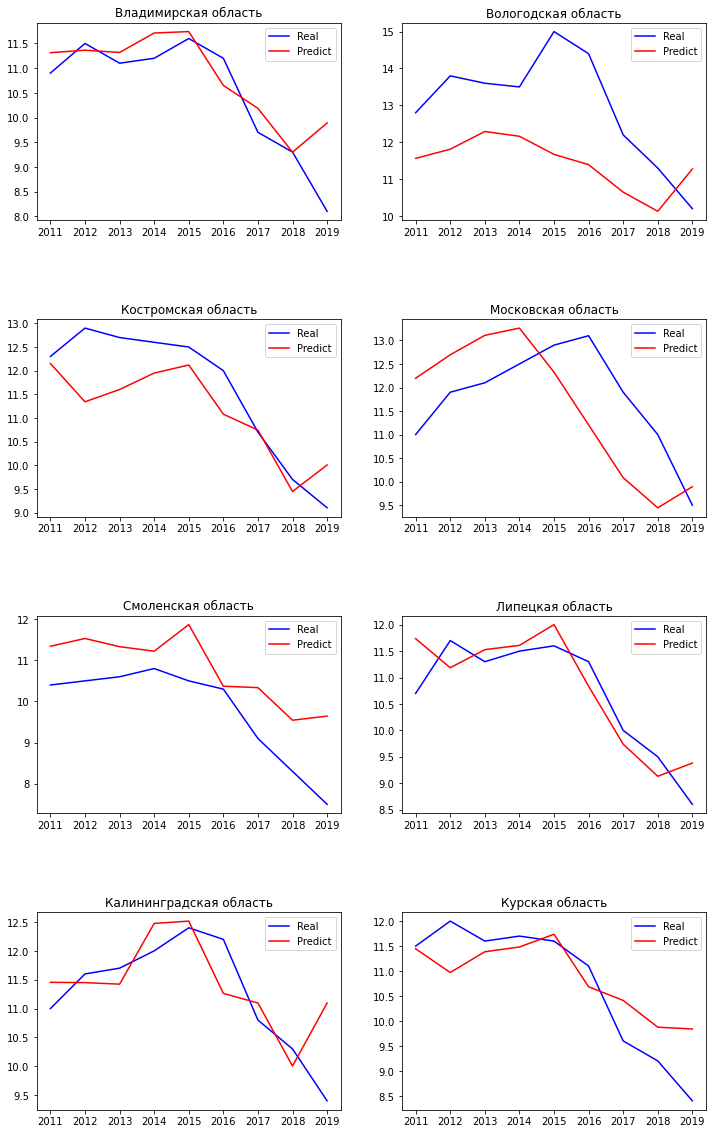

In [53]:
pool_prediction = res.predict().fitted_values
pool_residuals = res.resids
plt.figure(figsize=(12, 20))
plt.subplots_adjust(hspace=0.5)
index = random.sample(list(data['регион'].unique()), 8)
c = 1
for i in index:
    data2 = data[data['регион'] == i]
    x = data2['год']
    y = data2['общий коэффициент рождаемости']
    name = data2['регион']
    name = name.iloc[0]
    pred = pool_prediction[le.transform([i])[0]]

    plt.subplot(4, 2, c)
    plt.plot(x, y, color='blue', label='Real')
    plt.plot(x, pred, color='red', label='Predict')
    plt.legend()
    plt.title(f'{name}')
    c += 1

### FE

In [57]:
X = add_constant(new_data.drop(columns='общий коэффициент рождаемости'))
y = new_data['общий коэффициент рождаемости']

In [58]:
FE = PanelOLS(y, X, entity_effects=True, time_effects=False)
res2 = FE.fit()

In [56]:
res2.summary

Dep. Variable:,общий коэффициент рождаемости,R-squared:,0.5765
Estimator:,PanelOLS,R-squared (Between):,-0.4930
No. Observations:,252,R-squared (Within):,0.5765
Date:,"Wed, Jun 07 2023",R-squared (Overall):,0.1190
Time:,16:38:56,Log-likelihood,-267.60
Cov. Estimator:,Unadjusted,,
,,F-statistic:,36.760
Entities:,28,P-value,0.0000
Avg Obs:,9.0000,Distribution:,"F(8,216)"
Min Obs:,9.0000,,
Max Obs:,9.0000,F-statistic (robust):,36.760


In [59]:
X_new = X.drop(columns=['число фельдшерско-акушерских пунктов',
                        'число прерываний беременности',
                        'общий коэффициент брачности',
                        'средний возраст матери при рождении ребёнка'])

In [60]:
FE = PanelOLS(y, X_new, entity_effects=True, time_effects=False)
res2 = FE.fit()
res2.summary

Dep. Variable:,общий коэффициент рождаемости,R-squared:,0.5646
Estimator:,PanelOLS,R-squared (Between):,-0.7987
No. Observations:,252,R-squared (Within):,0.5646
Date:,"Wed, Jun 07 2023",R-squared (Overall):,-0.0186
Time:,19:31:30,Log-likelihood,-271.09
Cov. Estimator:,Unadjusted,,
,,F-statistic:,71.332
Entities:,28,P-value,0.0000
Avg Obs:,9.0000,Distribution:,"F(4,220)"
Min Obs:,9.0000,,
Max Obs:,9.0000,F-statistic (robust):,71.332


* x1 – численность безработных в возрасте 15-72 лет
* x2 – реальная среднемесячная начисленная заработная плата работников
* x3 – величина прожиточного минимума на ребенка в возрасте до 16 лет
* x4 – коэффициент младенческой смертности
$y_{it} = a_i + 0.0154x_{1it} - 0.0841x_{2it} - 0.0002x_{3it} + 0.2888x_{4it} + e_{it}$

где $a_i$ - индивидуальный для i-й панель параметр (ниже приведено несколько значений)

In [417]:
res2.estimated_effects

estimated_effects
регион год                    
1      2011          -0.351360
       2012          -0.351360
       2013          -0.351360
       2014          -0.351360
       2015          -0.351360
...                        ...
22     2015           1.982387
       2016           1.982387
       2017           1.982387
       2018           1.982387
       2019           1.982387

[252 rows x 1 columns]

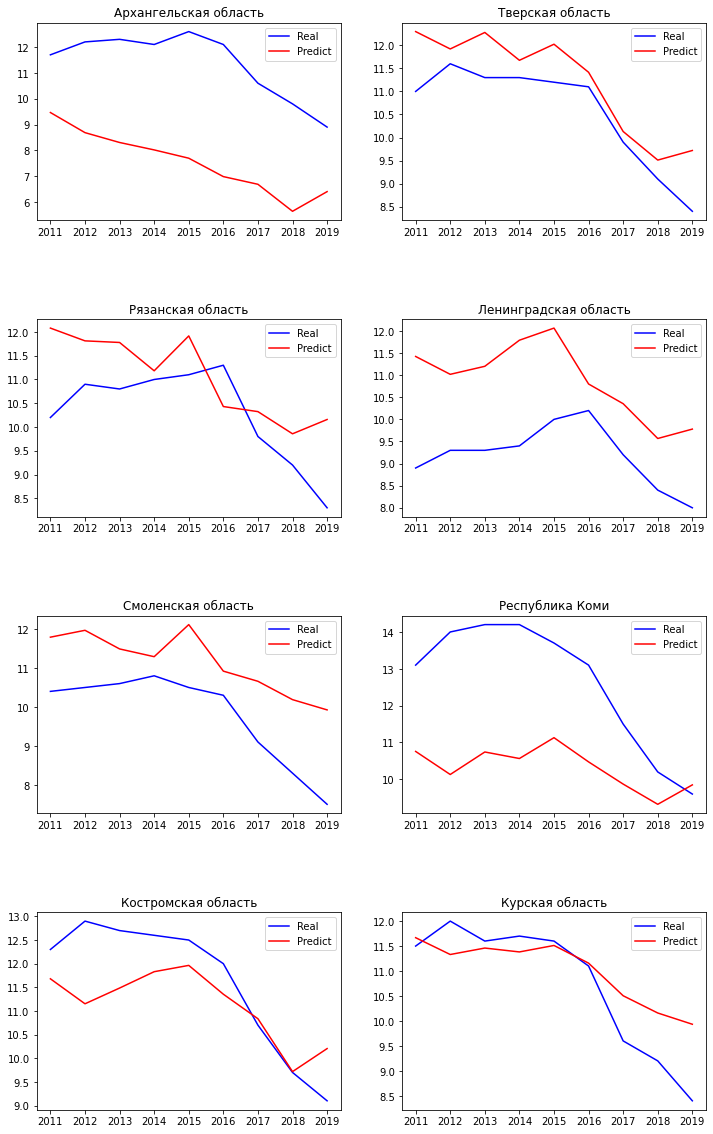

In [418]:
fe_prediction = res2.predict().fitted_values
fe_residuals = res2.resids
plt.figure(figsize=(12, 20))
plt.subplots_adjust(hspace=0.5)
index = random.sample(list(data['регион'].unique()), 8)
c = 1
for i in index:
    data2 = data[data['регион'] == i]
    x = data2['год']
    y = data2['общий коэффициент рождаемости']
    name = data2['регион']
    name = name.iloc[0]
    pred = fe_prediction[le.transform([i])[0]]

    plt.subplot(4, 2, c)
    plt.plot(x, y, color='blue', label='Real')
    plt.plot(x, pred, color='red', label='Predict')
    plt.legend()
    plt.title(f'{name}')
    c += 1

### RE

In [61]:
X = add_constant(new_data.drop(columns='общий коэффициент рождаемости'))
y = new_data['общий коэффициент рождаемости']

In [62]:
RE = RandomEffects(y, X)
res3 = RE.fit()

In [63]:
res3.summary

Dep. Variable:,общий коэффициент рождаемости,R-squared:,0.5177
Estimator:,RandomEffects,R-squared (Between):,0.0454
No. Observations:,252,R-squared (Within):,0.5603
Date:,"Wed, Jun 07 2023",R-squared (Overall):,0.3400
Time:,20:00:01,Log-likelihood,-294.88
Cov. Estimator:,Unadjusted,,
,,F-statistic:,32.603
Entities:,28,P-value,0.0000
Avg Obs:,9.0000,Distribution:,"F(8,243)"
Min Obs:,9.0000,,
Max Obs:,9.0000,F-statistic (robust):,32.603


In [64]:
X_new = X.drop(columns=['численность безработных в возрасте 15-72 лет',
                        'число фельдшерско-акушерских пунктов',
                        'средний возраст матери при рождении ребёнка',
                        'величина прожиточного минимума на ребенка в возрасте до 16 лет'])

In [65]:
RE = RandomEffects(y, X_new)
res3 = RE.fit()
res3.summary

Dep. Variable:,общий коэффициент рождаемости,R-squared:,0.5139
Estimator:,RandomEffects,R-squared (Between):,0.1532
No. Observations:,252,R-squared (Within):,0.5377
Date:,"Wed, Jun 07 2023",R-squared (Overall):,0.3732
Time:,20:02:24,Log-likelihood,-293.04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,65.279
Entities:,28,P-value,0.0000
Avg Obs:,9.0000,Distribution:,"F(4,247)"
Min Obs:,9.0000,,
Max Obs:,9.0000,F-statistic (robust):,65.279


In [424]:
res3.params

const                                                             14.204126
общий коэффициент брачности                                        0.198627
реальная среднемесячная начисленная заработная плата работников   -0.072686
число прерываний беременности                                      0.000064
коэффициент младенческой смертности                                0.330520
Name: parameter, dtype: float64

* x1 – общий коэффициент брачности
* x2 – реальная среднемесячная начисленная заработная плата работников
* x3 – число прерываний беременности
* x4 – коэффициент младенческой смертности
$y_{it} = a_i +0.198627x_{1it} -0.072686x_{2it} + 0.000064x{3it} + 0.330520x{4it} -1.179e-05GRP_{it} + 14.204126 + e_{it}$

In [425]:
res3.estimated_effects

estimated_effects
регион год                    
1      2011           0.130539
       2012           0.130539
       2013           0.130539
       2014           0.130539
       2015           0.130539
...                        ...
22     2015           0.986591
       2016           0.986591
       2017           0.986591
       2018           0.986591
       2019           0.986591

[252 rows x 1 columns]

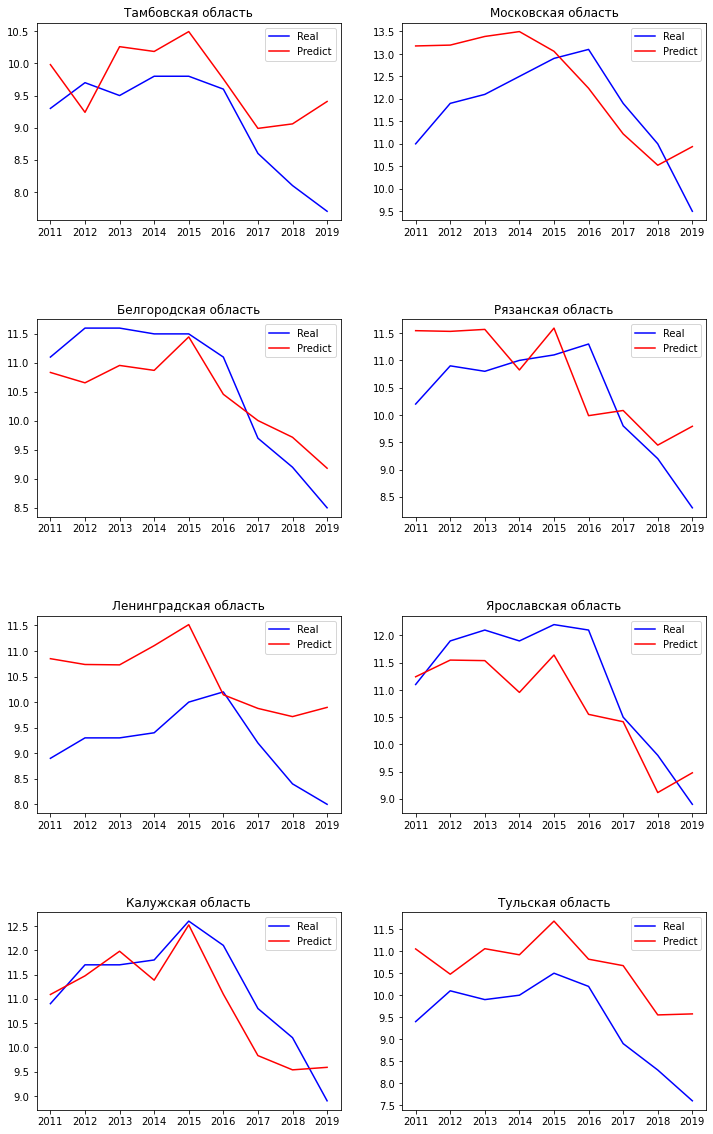

In [545]:
re_prediction = res3.predict().fitted_values
re_residuals = res3.resids
plt.figure(figsize=(12, 20))
plt.subplots_adjust(hspace=0.5)
index = random.sample(list(data['регион'].unique()), 8)
c = 1
for i in index:
    data2 = data[data['регион'] == i]
    x = data2['год']
    y = data2['общий коэффициент рождаемости']
    name = data2['регион']
    name = name.iloc[0]
    pred = re_prediction[le.transform([i])[0]]

    plt.subplot(4, 2, c)
    plt.plot(x, y, color='blue', label='Real')
    plt.plot(x, pred, color='red', label='Predict')
    plt.legend()
    plt.title(f'{name}')
    c += 1

### Тесты

In [314]:
import scipy 

2.3734481317648145e-13

In [300]:
# Тест 1 – Pool vs FE
fixed_effects = res2.estimated_effects.unstack(level=0).values[0]
print(fixed_effects)
print(res2.f_pooled)

[ 3.82568194 -0.35135984 -0.97949098 -0.58783066  1.74645929 -1.04512577
 -0.58758193  0.3534127   0.07640462  0.47524883 -0.26775396 -1.70008166
 -0.31587876 -0.27816199 -0.20686648  0.87175802  0.78207512 -1.01137465
 -0.17879489  0.67434903  2.30665289 -0.77132616  1.9823871  -1.37200932
 -1.33501734 -0.67476448 -1.60493619  0.17392552]
Pooled F-statistic
H0: Effects are zero
Statistic: 15.7516
P-value: 0.0000
Distributed: F(27,220)


Так как $F_{набл} > F_{крит}$, $p-value < \alpha=0.05$, $H_0$ отклоняется в пользу алтернативной гипотезы, лучшей моделью признается модель с фиксированными эффектами.

In [323]:
# Тест 2 – Pool vs RE
n = X.index.levels[0].size
T = X.index.levels[1].size
D = np.kron(np.eye(n), np.ones(T)).T
e = res.resids
LM = (e.dot(D).dot(D.T).dot(e) / e.dot(e) - 1) ** 2 * n * T / 2 / (T - 1)
LM_pvalue = scipy.stats.chi2(1).sf(LM)
print(f'LM Test: chisq = {LM}, df = 1, p-value = {round(LM_pvalue, 5)}')

LM Test: chisq = 191.33973721671057, df = 1, p-value = 0.0


Так как $LM > \chi^2(1)$, $p-value < \alpha=0.05$, $H_0$ отклоняется в пользу алтернативной гипотезы, лучшей моделью признается модель со случайными эффектами.

In [359]:
# Тест 3 – FE vs RE
# H0: RE
import numpy.linalg as la
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B))
    
    pval = scipy.stats.chi2.sf(chi2, df)
    
    return chi2, df, pval

hausman_results = hausman(res2, res3) 
print(f'chi-Squared: {str(hausman_results[0])}')
print(f'p-Value: {str(hausman_results[2])}')

chi-Squared: 8.028264966678119
p-Value: 0.5313003173482729


Так как $p-value > \alpha=0.05$, $H_0$ не отклоняется в пользу алтернативной гипотезы, лучшей моделью признается модель со случайными эффектами.

In [367]:
res3.summary  # финальная модель

Dep. Variable:,общий коэффициент рождаемости,R-squared:,0.5139
Estimator:,RandomEffects,R-squared (Between):,0.1532
No. Observations:,252,R-squared (Within):,0.5377
Date:,"Thu, Jun 02 2022",R-squared (Overall):,0.3732
Time:,00:22:49,Log-likelihood,-293.04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,65.279
Entities:,28,P-value,0.0000
Avg Obs:,9.0000,Distribution:,"F(4,247)"
Min Obs:,9.0000,,
Max Obs:,9.0000,F-statistic (robust):,65.279


### Рассчет экономических коэффициентов для итоговой модели

Коэффициент эластичности показывает, на сколько процентов изменится значение исследуемой величины при изменении соответствующего фактора на 1%

In [373]:
res3.params.index[1:]

Index(['общий коэффициент брачности',
       'реальная среднемесячная начисленная заработная плата работников',
       'число прерываний беременности', 'коэффициент младенческой смертности'],
      dtype='object')

In [374]:
marry_model = res3.params['общий коэффициент брачности']
sal_model = res3.params['реальная среднемесячная начисленная заработная плата работников']
prer_model = res3.params['число прерываний беременности']
dead_model = res3.params['коэффициент младенческой смертности']

marry = data['общий коэффициент брачности']
sal = data['реальная среднемесячная начисленная заработная плата работников']
prer = data['число прерываний беременности']
dead = data['коэффициент младенческой смертности']

In [375]:
e_marry = marry_model * marry.mean() / y.mean()
e_sal = sal_model * sal.mean() / y.mean()
e_prer = prer_model * prer.mean() / y.mean()
e_dead = dead_model * dead.mean() / y.mean()

e_marry, e_sal, e_prer, e_dead

(0.13758905261482085,
 -0.6833771140844963,
 0.05491286834046355,
 0.18512982276434353)

Бета-коэффициент показывает, на какую часть своего СКО изменится значение исследуемой переменной при изменении соответствующего фактора на 1 СКО

In [384]:
beta_marry = marry_model * marry.std() / y.std()
beta_sal = sal_model * sal.std() / y.std()
beta_prer = prer_model * prer.std() / y.std()
beta_dead = dead_model * dead.std() / y.std()

beta_marry, beta_sal, beta_prer, beta_dead

(0.17269547821672437,
 -0.28085675024784906,
 0.3602643687383942,
 0.3816594504558522)

Дельта-коэффициент показывает среднюю долю влияния соответствующего фактора в совокупном влиянии всех факторов, включенных в модель

In [383]:
r2 = 0.5139

In [385]:
delta_marry = np.corrcoef(marry, y)[0][1] * beta_marry / r2
delta_sal = np.corrcoef(sal, y)[0][1] * beta_sal / r2
delta_prer = np.corrcoef(prer, y)[0][1] * beta_prer / r2
delta_dead = np.corrcoef(dead, y)[0][1] * beta_dead / r2

delta_marry, delta_sal, delta_prer, delta_dead

(0.14075760632858783,
 0.15220923860870422,
 0.21018287820259893,
 0.2815814462585799)

### График с предсказаниями всех моделей

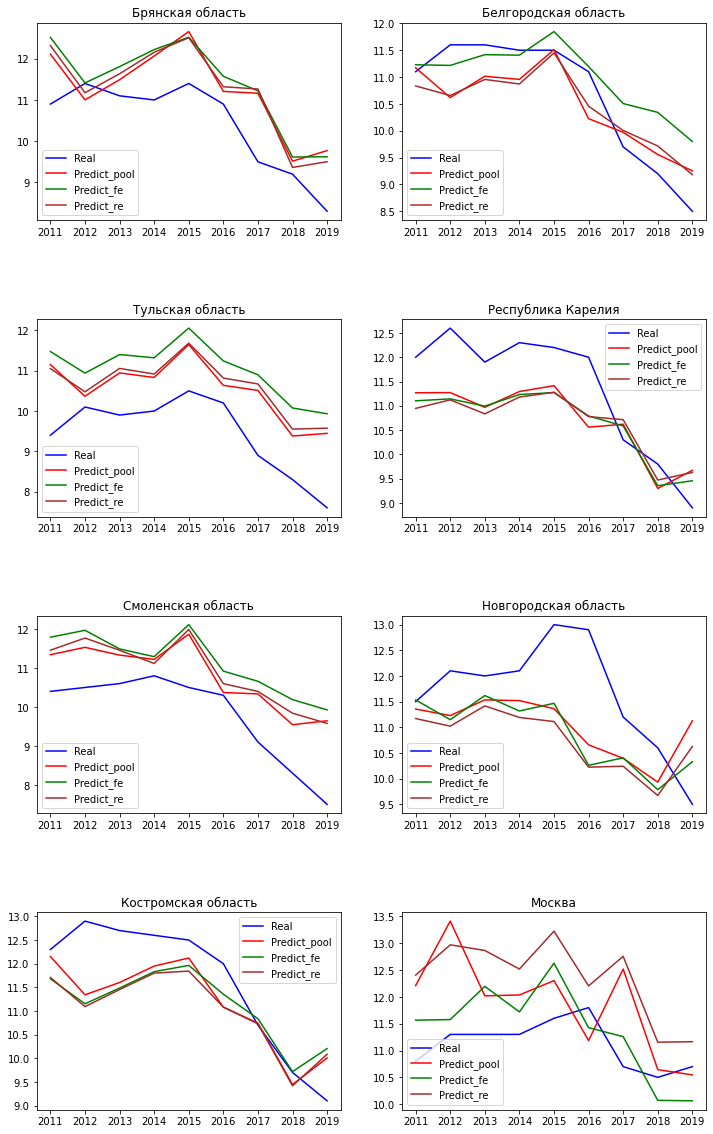

In [429]:
pool_prediction = res.predict().fitted_values
pool_residuals = res.resids
fe_prediction = res2.predict().fitted_values
fe_residuals = res2.resids
re_prediction = res3.predict().fitted_values
re_residuals = res3.resids
plt.figure(figsize=(12, 20))
plt.subplots_adjust(hspace=0.5)
index = random.sample(list(data['регион'].unique()), 8)
c = 1
for i in index:
    data2 = data[data['регион'] == i]
    x = data2['год']
    y = data2['общий коэффициент рождаемости']
    name = data2['регион']
    name = name.iloc[0]
    pred1 = pool_prediction[le.transform([i])[0]]
    pred2 = fe_prediction[le.transform([i])[0]]
    pred3 = re_prediction[le.transform([i])[0]]

    plt.subplot(4, 2, c)
    plt.plot(x, y, color='blue', label='Real')
    plt.plot(x, pred1, color='red', label='Predict_pool')
    plt.plot(x, pred2, color='green', label='Predict_fe')
    plt.plot(x, pred3, color='brown', label='Predict_re')
    plt.legend()
    plt.title(f'{name}')
    c += 1

In [434]:
X_new

const  общий коэффициент брачности  \
регион год                                          
1      2011 1.000000                     9.800000   
       2012 1.000000                     8.100000   
       2013 1.000000                     8.700000   
       2014 1.000000                     8.500000   
       2015 1.000000                     8.300000   
...              ...                          ...   
22     2015 1.000000                     8.300000   
       2016 1.000000                     8.100000   
       2017 1.000000                     8.400000   
       2018 1.000000                     6.900000   
       2019 1.000000                     7.600000   

             реальная среднемесячная начисленная заработная плата работников  \
регион год                                                                     
1      2011                                         102.400000                 
       2012                                         109.100000                 
       2013                                         103.600000                 
       2014                                         100.086946                 
       2015                                          93.221157                 
...                                                        ...                 
22     2015                                          92.476482                 
       2016                                         103.027733                 
       2017                                         105.742498                 
       2018                                         109.100000                 
       2019                                         104.719299                 

             число прерываний беременности  \
регион год                                   
1      2011                           7372   
       2012                           6622   
       2013                           6381   
       2014                           5380   
       2015                           5007   
...                                    ...   
22     2015                          23886   
       2016                          24770   
       2017                          20623   
       2018                          18667   
       2019                          18993   

             коэффициент младенческой смертности  
регион год                                        
1      2011                             5.000000  
       2012                             7.100000  
       2013                             6.484000  
       2014                             5.769000  
       2015                             6.200000  
...                                          ...  
22     2015                             4.400000  
       2016                             4.000000  
       2017                             3.700000  
       2018                             3.700000  
       2019                             3.600000  

[252 rows x 5 columns]

### Предсказание для Тульской области:

Так как по данным Росстата коэффициент младенческой смертности можно найти только до 2019 года, попробуем аппроксимировать его с помощью линейной регрессии.

In [453]:
from sklearn.linear_model import LinearRegression
X_m = data[data['регион'] == 'Тульская область'][['общий коэффициент брачности', 'реальная среднемесячная начисленная заработная плата работников', 'число прерываний беременности']]
y_m = data[data['регион'] == 'Тульская область']['коэффициент младенческой смертности']
m = LinearRegression()
m.fit(X_m, y_m)

LinearRegression()

In [458]:
((m.predict(X_m) - y_m)**2).sum()/len(y_m)  # ошибка

0.6486691771401718

In [460]:
m.predict([[6.508, 103.345223175552, 3871]])

/Users/tatyana/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.03986088])

In [464]:
X_pred

[1, 6.508, 103.345223175552, 3871, 6.04]

In [487]:
columns = ['const',
         'общий коэффициент брачности',
         'реальная среднемесячная начисленная заработная плата работников',
         'число прерываний беременности',
         'коэффициент младенческой смертности']
X_pred = [[1], [6.508], [103.345223175552], [3871], [6.04]]
dt = dict(zip(columns, X_pred))

In [488]:
le.transform(['Тульская область'])

array([26])

In [493]:
le.inverse_transform([26])

array(['Тульская область'], dtype=object)

In [489]:
X_pred = pd.DataFrame.from_dict(dt, orient='columns')

In [499]:
X_pred['регион'] = 26
X_pred['год'] = 2020
X_pred.set_index(['регион', 'год'], inplace=True)

In [500]:
X_pred

,,const,общий коэффициент брачности,реальная среднемесячная начисленная заработная плата работников,число прерываний беременности,коэффициент младенческой смертности
регион,год,,,,,
26,2020,1,6.508000,103.345223,3871,6.040000


In [528]:
res3.predict(X_pred)

,,predictions
регион,год,
26,2020,10.230638


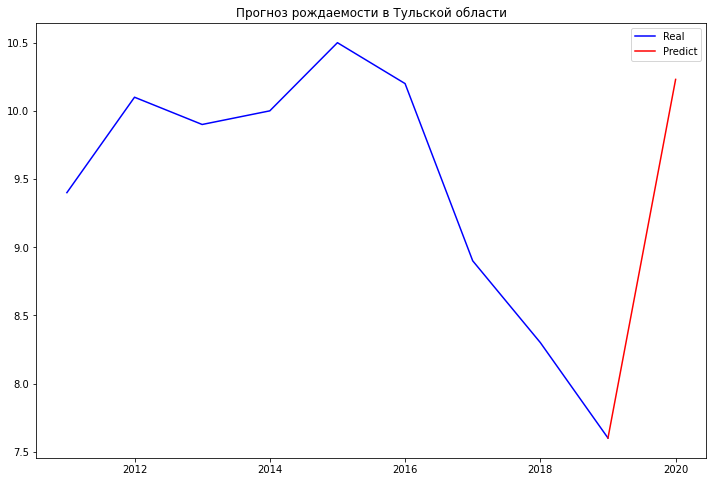

In [525]:
# re_prediction = res3.predict().fitted_values
# re_residuals = res3.resids
plt.figure(figsize=(12, 8))
data2 = data[data['регион'] == 'Тульская область']
x = data2['год'].tolist()
y = data2['общий коэффициент рождаемости'].tolist()
pred1 = np.array(y + res3.predict(X_pred).iloc[0].tolist())
plt.plot(x, y, color='blue', label='Real')
x += [2020]
plt.plot(x[-2:], pred1[-2:], color='red', label='Predict')
plt.legend()
plt.title(f'Прогноз рождаемости в Тульской области');

[\[1\] Факторы демографического развития России: опыт исследования панельных данных](https://cyberleninka.ru/article/n/faktory-demograficheskogo-razvitiya-rossii-opyt-issledovaniya-panelnyh-dannyh/viewer) \
[\[2\] Многомерный эконометрический анализ уровня рождаемости в России](https://studbooks.net/2240893/matematika_himiya_fizika/mnogomernyy_ekonometricheskiy_analiz_urovnya_rozhdaemosti_rossii)\
[\[3\] Исследование в новостях](https://newstula.ru/fn_513127.html)